<b>Phase 1 Assignment</b>

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pylab as plt
import numpy as np
from collections import defaultdict, Counter

<b>Load and print head of dataset</b>

In [2]:
df = pd.read_csv('../data/BreastCancerWisconsin.csv') 
print(df.head())

       Scn  A2  A3  A4  A5  A6  A7  A8  A9  A10  CLASS
0  1000025   5   1   1   1   2   1   3   1    1      2
1  1002945   5   4   4   5   7  10   3   2    1      2
2  1015425   3   1   1   1   2   2   3   1    1      2
3  1016277   6   8   8   1   3   4   3   7    1      2
4  1017023   4   1   1   3   2   1   3   1    1      2


<b>Replace ? by NaN in column A7</b>

In [3]:
df['A7'] = df['A7'].replace('?', np.NaN)
print(df[20:30])

        Scn  A2  A3  A4  A5  A6   A7  A8  A9  A10  CLASS
20  1054590   7   3   2  10   5   10   5   4    4      4
21  1054593  10   5   5   3   6    7   7  10    1      4
22  1056784   3   1   1   1   2    1   2   1    1      2
23  1057013   8   4   5   1   2  NaN   7   3    1      4
24  1059552   1   1   1   1   2    1   3   1    1      2
25  1065726   5   2   3   4   2    7   3   6    1      4
26  1066373   3   2   1   1   1    1   2   1    1      2
27  1066979   5   1   1   1   2    1   2   1    1      2
28  1067444   2   1   1   1   2    1   2   1    1      2
29  1070935   1   1   3   1   2    1   1   1    1      2


<b>Check datatype of columns</b>

In [5]:
print(df.dtypes)

Scn       int64
A2        int64
A3        int64
A4        int64
A5        int64
A6        int64
A7       object
A8        int64
A9        int64
A10       int64
CLASS     int64
dtype: object


<b>Converted back to numeric</b>

In [6]:
df['A7'] = pd.to_numeric(df['A7'])
print(df[20:30])

        Scn  A2  A3  A4  A5  A6    A7  A8  A9  A10  CLASS
20  1054590   7   3   2  10   5  10.0   5   4    4      4
21  1054593  10   5   5   3   6   7.0   7  10    1      4
22  1056784   3   1   1   1   2   1.0   2   1    1      2
23  1057013   8   4   5   1   2   NaN   7   3    1      4
24  1059552   1   1   1   1   2   1.0   3   1    1      2
25  1065726   5   2   3   4   2   7.0   3   6    1      4
26  1066373   3   2   1   1   1   1.0   2   1    1      2
27  1066979   5   1   1   1   2   1.0   2   1    1      2
28  1067444   2   1   1   1   2   1.0   2   1    1      2
29  1070935   1   1   3   1   2   1.0   1   1    1      2


<b>Check datatype of columns</b>

In [8]:
print(df.dtypes)

Scn        int64
A2         int64
A3         int64
A4         int64
A5         int64
A6         int64
A7       float64
A8         int64
A9         int64
A10        int64
CLASS      int64
dtype: object


<b>Check Null Values and Total Count</b>

In [9]:
print(pd.isnull(df['A7']).sum())

16


<b>Replace NaN values with the mean of column A7</b>

In [10]:
df = df.fillna(df.mean(skipna=True))
print(df[20:30])

        Scn  A2  A3  A4  A5  A6         A7  A8  A9  A10  CLASS
20  1054590   7   3   2  10   5  10.000000   5   4    4      4
21  1054593  10   5   5   3   6   7.000000   7  10    1      4
22  1056784   3   1   1   1   2   1.000000   2   1    1      2
23  1057013   8   4   5   1   2   3.544656   7   3    1      4
24  1059552   1   1   1   1   2   1.000000   3   1    1      2
25  1065726   5   2   3   4   2   7.000000   3   6    1      4
26  1066373   3   2   1   1   1   1.000000   2   1    1      2
27  1066979   5   1   1   1   2   1.000000   2   1    1      2
28  1067444   2   1   1   1   2   1.000000   2   1    1      2
29  1070935   1   1   3   1   2   1.000000   1   1    1      2


<b>Provide the summary statistics</b>

In [11]:
print(df.describe())

                Scn          A2          A3          A4          A5  \
count  6.990000e+02  699.000000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.417740    3.134478    3.207439    2.806867   
std    6.170957e+05    2.815741    3.051459    2.971913    2.855379   
min    6.163400e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.706885e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171710e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238298e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   

               A6          A7          A8          A9         A10       CLASS  
count  699.000000  699.000000  699.000000  699.000000  699.000000  699.000000  
mean     3.216023    3.544656    3.437768    2.866953    1.589413    2.689557  
std      2.214300    3.601852    2.438364    3.053634    1.715078    0.951273  
min      1.000000    1.000000    1.00000

<b>Find number of columns and number of rows</b>

In [12]:
rows, columns = df.shape
print('Rows:: '+ str(rows) + '\nColumns:: ' + str(columns))

Rows:: 699
Columns:: 11


<b>Report how many unique id values (column Scn)</b>

In [14]:
print(len(df['Scn'].unique()))

645


<b>Draw histograms for columns A2-A10</b>

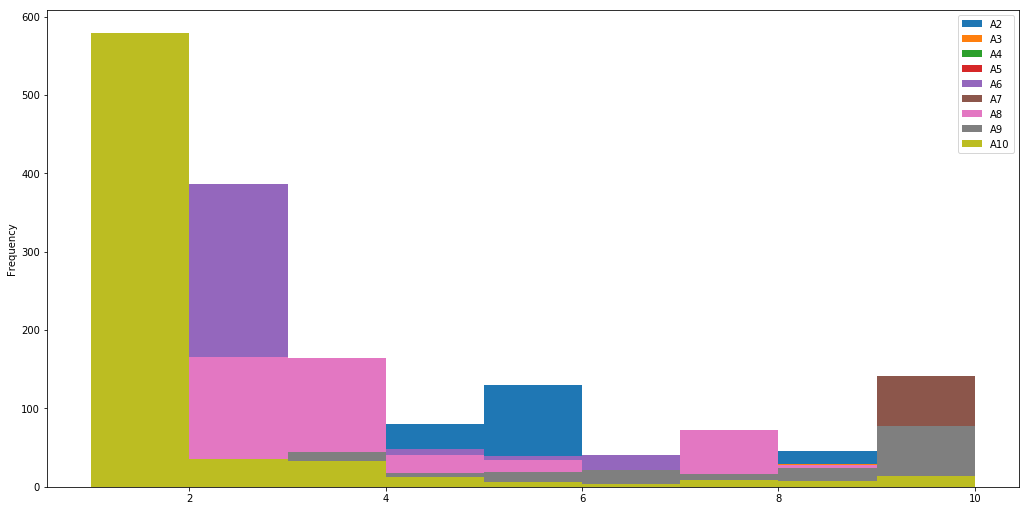

In [15]:
df.iloc[:, 1:10].plot(kind='hist',bins=9,figsize=(12,6))
plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 

<b>Create a count based on groupby</b>

In [17]:
benign, malignant = pd.value_counts(df['CLASS'])
print( 'Benign::'+ str(benign) +'\nMalignant::'+str(malignant))

Benign::458
Malignant::241


<b>Make a scater plot with two features</b>

Text(0,0.5,'Counts of benign and malignant values')

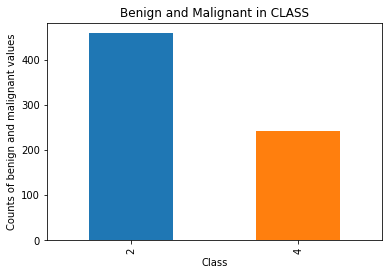

In [18]:
ax = pd.value_counts(df['CLASS']).plot(kind='bar', title="Benign and Malignant in CLASS")
ax.set_xlabel("Class")
ax.set_ylabel("Counts of benign and malignant values")

<b>Scatter chart for Clump Thickness and Normal Nuclei</b>

Text(0,0.5,'Normal Nuclei')

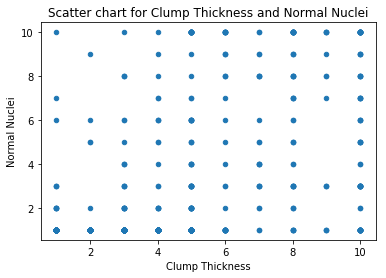

In [19]:
ax =df.plot(kind='scatter', x='A2', y='A9', title="Scatter chart for Clump Thickness and Normal Nuclei")
ax.set_xlabel("Clump Thickness")
ax.set_ylabel("Normal Nuclei")

<b>Graph a box plot to visualize the shape of the distribution, its central value, and its variability</b>

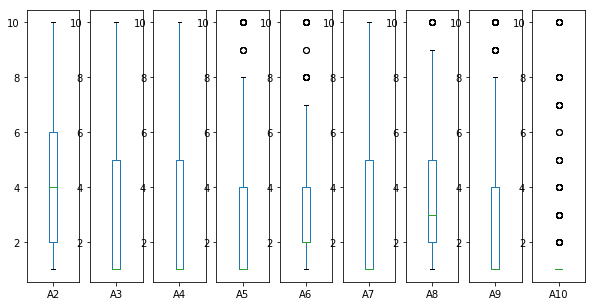

In [20]:
df.iloc[:, 1:10].plot(kind='box',figsize=(10,5),subplots=True)
plt.show()